# HW 5, problem 2

Implementing MC control to find an optimal policy for the game of blackjack

In [1]:
# solving the black jack game described in example 5.1
using Random, StatsBase

# the face values for a suit
# ace through nine, ten, jack, queen, king
# note that 1=ace
suit = vcat(1, collect(2:9), 10, 10, 10, 10)

# a deck of cards consists of four suits: diamonds, clubs, hearts, spades
deck = repeat(suit, 4)
shuffle!(deck)     # a random permutation

# to simulate an infinite deck, we can sample with replacement
deal_cards(n) = sample(deck, n, replace=true)

# note that it's quite possible (in fact it's common) to have more than
# one ace in a hand, but it's not possible to have two "usable" aces.
# 1/2 = no/yes
usable_ace(hand) = (any(hand .== 1) && sum(hand) <= 11) ? 2 : 1

score(hand) = sum(hand) + (usable_ace(hand)==2 ? 10 : 0)

# simulate an episode of blackjack according to policy pi
function blackjack(pi, ϵ = 0.05)

    # THIS FUNCTION IS INCOMPLETE.
    player = deal_cards(2)
    dealer = deal_cards(2)
    while score(player) < 12
        append!(player, deal_cards(1))
    end
    
    states = []  # (player's sum, dealer's showing card, usable ace)
    actions = []  # hit/stick = 1/2
    
    # check for natural
    if score(player) == 21
        append!(actions, 2)
        push!(states, (score(player)-11, dealer[1], usable_ace(player)))
        if score(dealer) == 21
            return states, actions, 0.0
        else
            return states, actions, 1.0
        end
    end
    
    # player's turn
    while true
        # determine action a according to policy pi
        a = pi[score(player)-11, dealer[1], usable_ace(player)]
        if rand() < ϵ
            a = a == 1 ? 2 : 1
        end
        
        if a == 2  # stick
            append!(actions, a)
            push!(states, (score(player)-11, dealer[1], usable_ace(player)))
            break
        else  # hit
            append!(actions, a)
            append!(player, deal_cards(1))
            if score(player) > 21  # player went bust
                push!(states, (10, dealer[1], usable_ace(player)))
                return states, actions, -1.0
            else
                push!(states, (score(player)-11, dealer[1], usable_ace(player)))
            end
        end
    end
    
    # dealer's turn
    while score(dealer) < 17
        append!(dealer, deal_cards(1))
    end
    
    r = 0.0
    if score(dealer) > 21 || score(player) > score(dealer)
        r = 1.0
    elseif score(player) < score(dealer)
        r = -1.0
    end
        
    return states, actions, r
end

# this is on-policy every-visit MC control because we do not check for
# 1st visits to states; however, for the game of blackjack, it's not
# possible to visit the same state twice in an episode. you could have
# an ace being counted as 11, and then later being counted as 1, but
# the indicator for a usable ace is part of the state.  also, note
# that we maintain exploration of nonoptimal actions in the function
# blackjack().
function MC!(q, qn, pi)
    for i = 1:10e6
        i % 100000 == 0 && println("episode ", i)
        states, actions, r = blackjack(pi)
        @assert(length(states) == length(actions))
        @assert( r in [-1.0, 0.0, 1.0])
        T = length(states)
        for t = 1:T
            # since this is every-visit MC, the reward at the end
            # of the episode is the return for each state visited, and
            # there is no discounting, the direction of iteration over
            # the episode should not matter.
            
            # THIS FUNCTION IS INCOMPLETE.
            # the steps below need to be completed.
            
            # obtain the state s and action a for play t
            s = states[t]
            a = actions[t]
            
            # update qn
            qn[s[1], s[2], s[3], a] += 1
            
            # update q (this is an incremental update)
            q[s[1], s[2], s[3], a] += (r - q[s[1], s[2], s[3], a]) / qn[s[1], s[2], s[3], a]
            
            # find the action that maxmizes q for state s
            a = findmax(q[s[1], s[2], s[3], :])[2]
            
            # update the policy
            pi[s[1], s[2], s[3]] = a
        end
    end
end

# the state space consists of
# the player's sum 12:21,
# the dealer's showing card 1:10,
# and indicator for usable ace no/yes=1/2
# for a total of 200 possible states.
# the action is hit/stick=1/2

# the initial policy is to stick when the player's sum is 20 or 21, otherwise hit
pi = fill(1, (10, 10, 2))
pi[9:10,:,:] .= 2           # stick when sum is 20 or 21
q = zeros(10, 10, 2, 2)    # q(state=(player,dealer,usable), action)
qn = zeros(10, 10, 2, 2)   # to hold the number of observations

MC!(q, qn, pi)


episode 100000.0
episode 200000.0
episode 300000.0
episode 400000.0
episode 500000.0
episode 600000.0
episode 700000.0
episode 800000.0
episode 900000.0
episode 1.0e6
episode 1.1e6
episode 1.2e6
episode 1.3e6
episode 1.4e6
episode 1.5e6
episode 1.6e6
episode 1.7e6
episode 1.8e6
episode 1.9e6
episode 2.0e6
episode 2.1e6
episode 2.2e6
episode 2.3e6
episode 2.4e6
episode 2.5e6
episode 2.6e6
episode 2.7e6
episode 2.8e6
episode 2.9e6
episode 3.0e6
episode 3.1e6
episode 3.2e6
episode 3.3e6
episode 3.4e6
episode 3.5e6
episode 3.6e6
episode 3.7e6
episode 3.8e6
episode 3.9e6
episode 4.0e6
episode 4.1e6
episode 4.2e6
episode 4.3e6
episode 4.4e6
episode 4.5e6
episode 4.6e6
episode 4.7e6
episode 4.8e6
episode 4.9e6
episode 5.0e6
episode 5.1e6
episode 5.2e6
episode 5.3e6
episode 5.4e6
episode 5.5e6
episode 5.6e6
episode 5.7e6
episode 5.8e6
episode 5.9e6
episode 6.0e6
episode 6.1e6
episode 6.2e6
episode 6.3e6
episode 6.4e6
episode 6.5e6
episode 6.6e6
episode 6.7e6
episode 6.8e6
episode 6.9e6
episode

### An optimal policy for blackjack

Top matrix is for no usable ace, bottom matrix is for usable ace.

In [2]:
pi

10×10×2 Array{Int64, 3}:
[:, :, 1] =
 1  1  2  2  2  2  1  1  1  1
 1  2  2  2  2  2  1  1  1  1
 1  2  2  2  2  2  1  1  1  1
 1  2  2  2  2  2  1  1  1  1
 1  2  2  2  2  2  1  1  2  2
 2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2

[:, :, 2] =
 1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1
 1  2  2  2  2  2  2  2  1  1
 2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2
 2  2  2  2  2  2  2  2  2  2

### Plotting the above optimal policy for blackjack

The y-axis for both graphs is player sum minus 11, so the true player sum for each dealer showing is the y-value plus 11. Both graphs match closely with those in Figure 5.2 in the textbook.

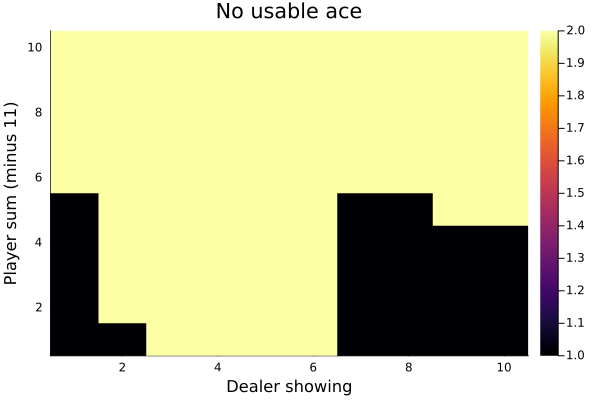

In [3]:
using Plots
heatmap(1:10, 1:10, pi[:, :, 1], title="No usable ace",
    xlabel="Dealer showing", ylabel="Player sum (minus 11)")

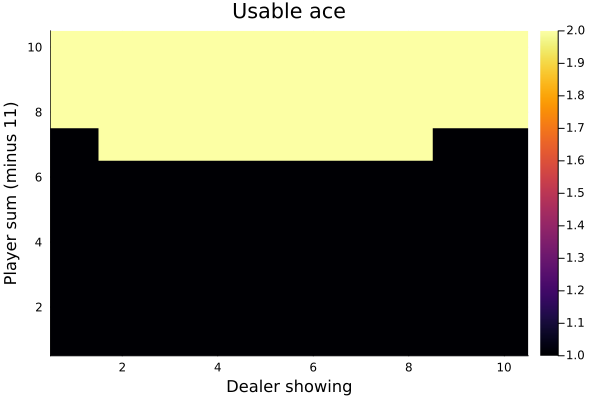

In [4]:
heatmap(1:10, 1:10, pi[:, :, 2], title="Usable ace", 
    xlabel="Dealer showing", ylabel="Player sum (minus 11)")